<a href="https://colab.research.google.com/github/Amruth-varsh/AI-Based-Container-ETA-Prediction-to-Streamline-Port-Operations/blob/main/Dpworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📌 Step 1: Install required packages
!pip install xgboost scikit-learn pandas matplotlib seaborn

# 📌 Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

# 📌 Step 3: Load the dataset (upload your file or use your path)


df = pd.read_csv('/content/dummy_ais_eta_data.csv')
df.head()


,MMSI,Latitude,Longitude,Speed_knots,Destination_Port,Distance_to_Port_km,Weather_Condition,ETA_hours
0,634895718,52.997020,102.991935,15.681788,Singapore,342.657752,Rainy,40.081974
1,299900595,44.015377,90.007716,14.696599,Shanghai,565.413219,Foggy,14.490974
2,962061404,32.524963,9.890135,18.848721,Jebel Ali,533.373373,Rainy,46.401584
3,887846414,10.663248,-60.917977,10.388247,Jebel Ali,654.515987,Clear,23.034197
4,227521863,57.110088,-5.836350,9.882510,Rotterdam,287.938728,Windy,40.733061


In [2]:
# Encode categorical columns
le_port = LabelEncoder()
df['Destination_Port'] = le_port.fit_transform(df['Destination_Port'])

le_weather = LabelEncoder()
df['Weather_Condition'] = le_weather.fit_transform(df['Weather_Condition'])

# Define features and target
features = ['Latitude', 'Longitude', 'Speed_knots', 'Destination_Port', 'Distance_to_Port_km', 'Weather_Condition']
target = 'ETA_hours'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Train the model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f} hours")
print(f"RMSE: {rmse:.2f} hours")


MAE: 14.02 hours
RMSE: 16.70 hours


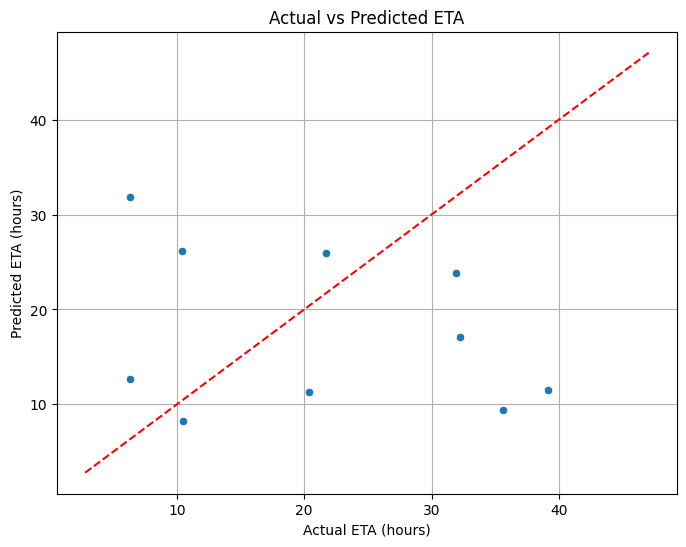

In [4]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual ETA (hours)")
plt.ylabel("Predicted ETA (hours)")
plt.title("Actual vs Predicted ETA")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid()
plt.show()
